In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/df_calc.csv')

In [ ]:
df.head()

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы в мес.,Город,...,частичная занятость,проектная работа,стажировка,волонтёрство,гибкий график,полный день,удаленная работа,сменный график,вахтовый метод,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,другие,...,True,True,False,False,True,True,True,True,True,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее образование,М,60,233.0,другие,...,True,True,False,False,True,True,True,True,False,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123.0,другие,...,False,False,False,False,False,True,False,False,False,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее образование,М,38,225.0,другие,...,True,True,False,False,True,False,True,False,False,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее образование,Ж,26,67.0,Москва,...,False,False,False,False,False,True,False,False,False,140000.0


In [ ]:
df['Возраст'].mode()

0    30
Name: Возраст, dtype: int64

In [ ]:
df['Опыт работы в мес.'].max()

1188.0

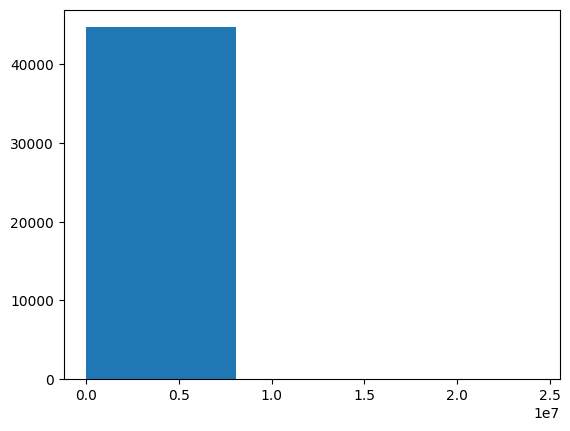

In [ ]:
plt.hist(df['ЗП (руб)'], bins=3)
plt.show()

[]

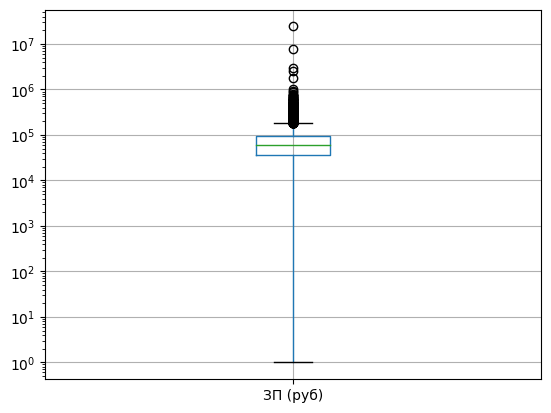

In [ ]:
boxplot = df.boxplot(column=['ЗП (руб)'])
plt.semilogy()

In [ ]:
df_clear = df.loc[df['ЗП (руб)'] > 1e6].copy()

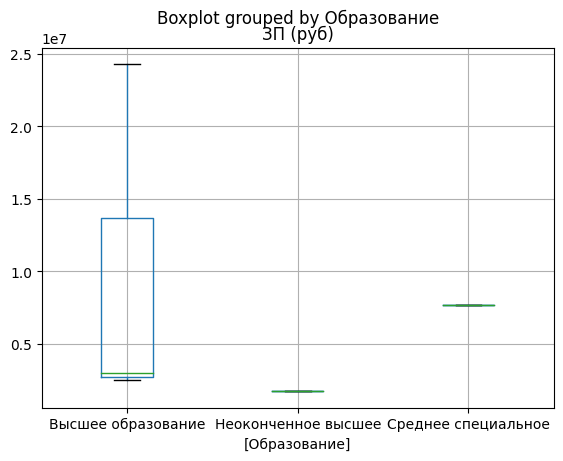

In [ ]:
boxplot = df_clear.boxplot(column=['ЗП (руб)'], by=['Образование'])

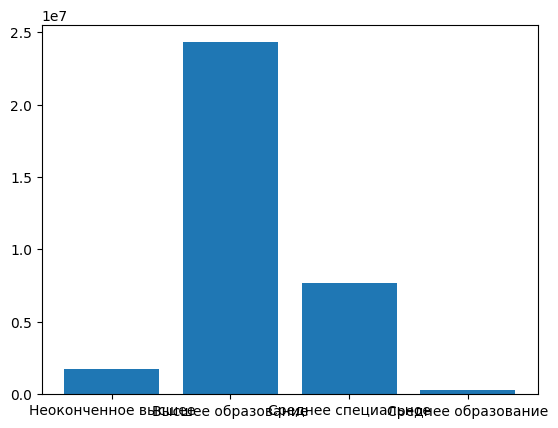

In [ ]:
plt.bar(df['Образование'], df['ЗП (руб)'])
plt.show()

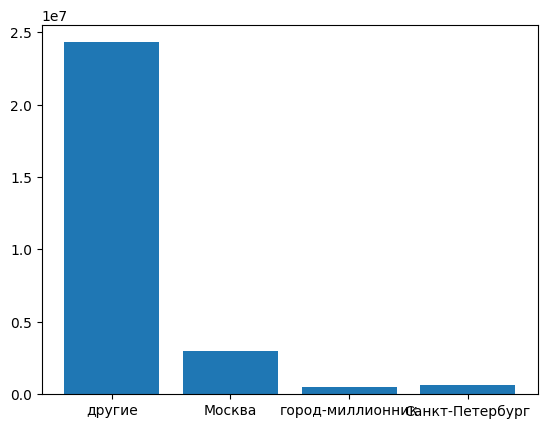

<Figure size 2000x600 with 0 Axes>

In [ ]:
plt.bar(df['Город'], df['ЗП (руб)'])
plt.figure(figsize=(20,6))
plt.show()

In [ ]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 26939 to 43775
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        5 non-null      object 
 1   Последнее/нынешнее место работы  5 non-null      object 
 2   Последняя/нынешняя должность     5 non-null      object 
 3   Обновление резюме                5 non-null      object 
 4   Авто                             5 non-null      object 
 5   Образование                      5 non-null      object 
 6   Пол                              5 non-null      object 
 7   Возраст                          5 non-null      int64  
 8   Опыт работы в мес.               5 non-null      float64
 9   Город                            5 non-null      object 
 10  Готовность к переезду            5 non-null      bool   
 11  Готовность к командировкам       5 non-null      bool   
 12  полная занятость  

In [ ]:
df_mobile_worker = df.loc[(df['Готовность к переезду'] & df['Готовность к командировкам']) == True].copy()

In [ ]:
df_mobile_worker['ЗП (руб)'].median()/1000

65.849455

In [ ]:
hm = pd.pivot_table(df, values=['ЗП (руб)'], index=['Образование'], columns=['Возраст'], aggfunc='median')

In [ ]:
print(hm.index.to_list())

['Высшее образование', 'Неоконченное высшее', 'Среднее образование', 'Среднее специальное']


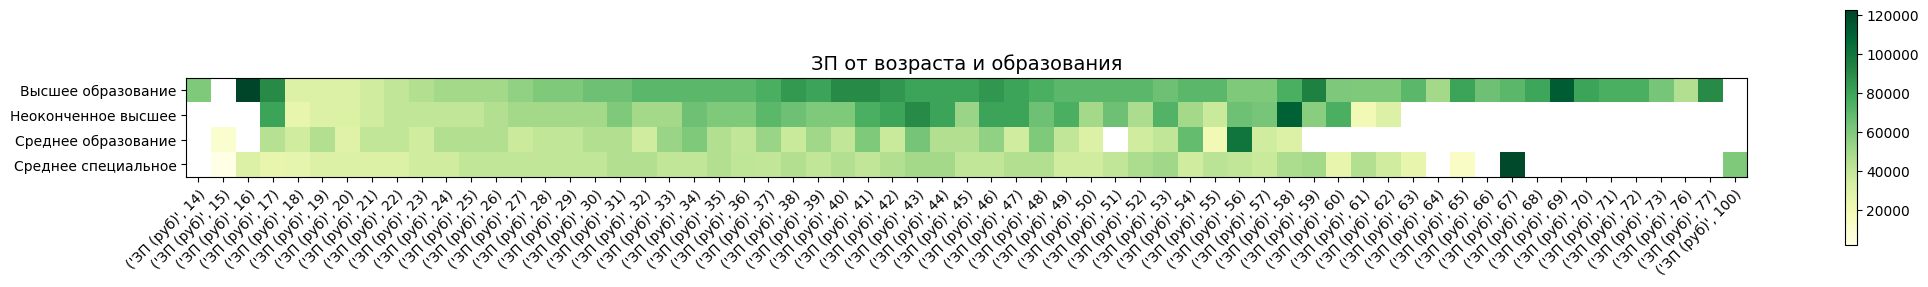

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
im = ax.imshow(hm, cmap="YlGn")

cbar = ax.figure.colorbar(im,
                          ax = ax,
                          shrink=0.5 )

ax.set_title("ЗП от возраста и образования", size=14)
fig.tight_layout()

educations = hm.index.values
ages = hm.columns.values

# Add axis tick labels
ax.set_xticks(np.arange(len(ages)),
              labels=ages)
ax.set_yticks(np.arange(len(educations)),
              labels=educations)

# Rotate the tick labels to be more legible
plt.setp(ax.get_xticklabels(),
         rotation = 45,
         ha = "right",
         rotation_mode = "anchor")
plt.show()

In [ ]:
df['опыт работы в годах'] = (df['Опыт работы в мес.']/12).round()

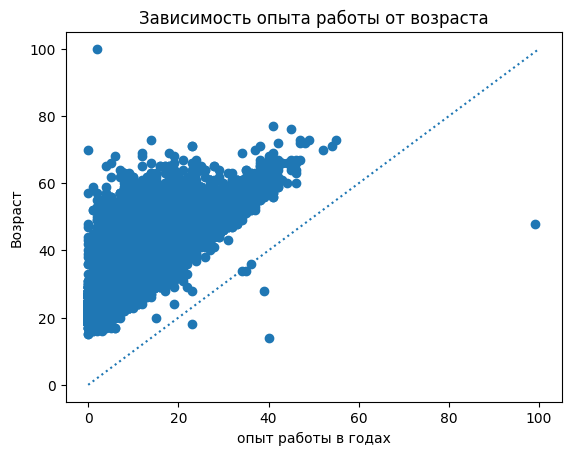

In [ ]:
plt.scatter(df['опыт работы в годах'], df['Возраст'])

plt.xlabel("опыт работы в годах")
plt.ylabel("Возраст")
plt.title("Зависимость опыта работы от возраста")

x = [0, 100]
y = [0, 100]
plt.plot(x, y, linestyle = 'dotted')

plt.show()

##Дополнительное задание

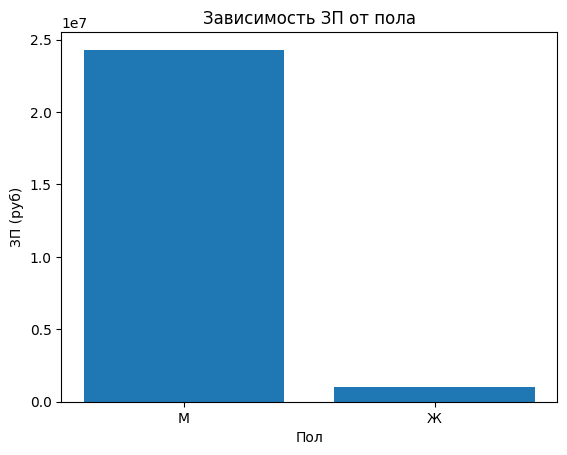

In [ ]:
plt.bar(df['Пол'], df['ЗП (руб)'])

plt.xlabel("Пол")
plt.ylabel("ЗП (руб)")
plt.title("Зависимость ЗП от пола")

plt.show()

In [ ]:
df_office = df.loc[df['удаленная работа'] == True].copy()
df_home_work = df.loc[df['удаленная работа'] == False].copy()

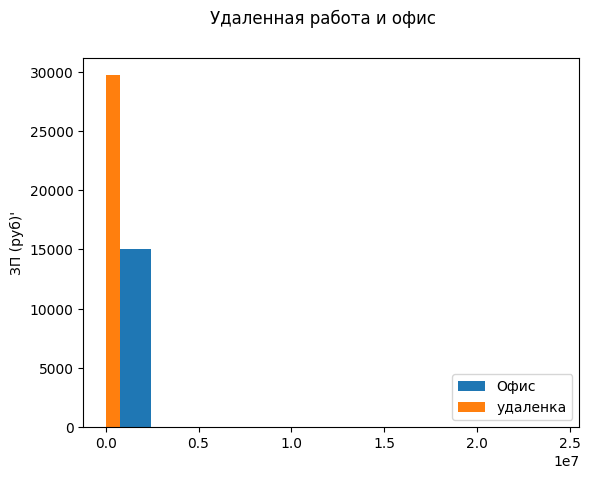

In [ ]:
fig, axs = plt.subplots()
fig.suptitle('Удаленная работа и офис')

plt.hist(df_office['ЗП (руб)'])
plt.hist(df_home_work['ЗП (руб)'])

# Function add a legend
plt.legend(["Офис", "удаленка"], loc ="lower right")

plt.ylabel("ЗП (руб)'")

plt.show()

In [82]:
df = pd.read_csv('/content/df_calc.csv')

In [83]:
df.shape

(44744, 23)

In [84]:
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме']).dt.date

In [85]:
df.duplicated(keep='last').sum()

161

In [ ]:
df = df.drop_duplicates(keep=False)

In [ ]:
df.shape


(44428, 23)

In [ ]:
df.isna().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы в мес.                 166
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
стажировка                           0
волонтёрство                         0
гибкий график                        0
полный день                          0
удаленная работа                     0
сменный график                       0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

In [25]:
df = df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

In [26]:
df.isna().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      0
Последняя/нынешняя должность         0
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы в мес.                 166
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
стажировка                           0
волонтёрство                         0
гибкий график                        0
полный день                          0
удаленная работа                     0
сменный график                       0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

In [28]:
df = df.fillna(df["Опыт работы в мес."].median())

In [29]:
df.isna().sum()

Ищет работу на должность:          0
Последнее/нынешнее место работы    0
Последняя/нынешняя должность       0
Обновление резюме                  0
Авто                               0
Образование                        0
Пол                                0
Возраст                            0
Опыт работы в мес.                 0
Город                              0
Готовность к переезду              0
Готовность к командировкам         0
полная занятость                   0
частичная занятость                0
проектная работа                   0
стажировка                         0
волонтёрство                       0
гибкий график                      0
полный день                        0
удаленная работа                   0
сменный график                     0
вахтовый метод                     0
ЗП (руб)                           0
dtype: int64

In [30]:
df["Опыт работы в мес."].mean().round()

114.0

In [35]:
df.loc[(df['ЗП (руб)'] > 1e6) | (df['ЗП (руб)'] < 1e3)].value_counts().sum()

89

In [38]:
df.shape

(44337, 23)

In [36]:
df = df.drop(df.loc[(df['ЗП (руб)'] > 1e6) | (df['ЗП (руб)'] < 1e3)].index)

In [37]:
df.shape

(44337, 23)

In [44]:
df = df.drop(df.loc[df['Опыт работы в мес.']/12 > df['Возраст'] ].index)

In [45]:
df.shape

(44330, 23)

#Метод Z отклонений

In [75]:
df['stats_ages'] = stats.zscore(np.log(df['Возраст']))

In [76]:
df.loc[(df['stats_ages'] > 4) | (df['stats_ages'] < -3) ].value_counts().sum()

3

In [49]:
ages = df['Возраст']

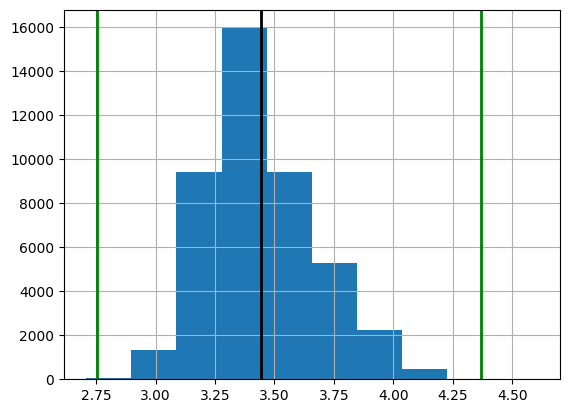

In [72]:
plt.axvline(np.log(ages).mean(), color='k', lw=2)
plt.axvline(np.log(ages).mean() + np.log(ages).std()*4, color='g', lw=2)
plt.axvline(np.log(ages).mean() - np.log(ages).std()*3, color='g', lw=2)
np.log(df['Возраст']).hist()

plt.show()
